# Testing the tools and their implementtion with exmples form documentation

In [ ]:
# Import
import numpy as np 
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# import featuretools
# import autofeat

import matplotlib.pyplot as plt 

# TS Fresh example

In [ ]:
import tsfresh
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0
(1320, 8)


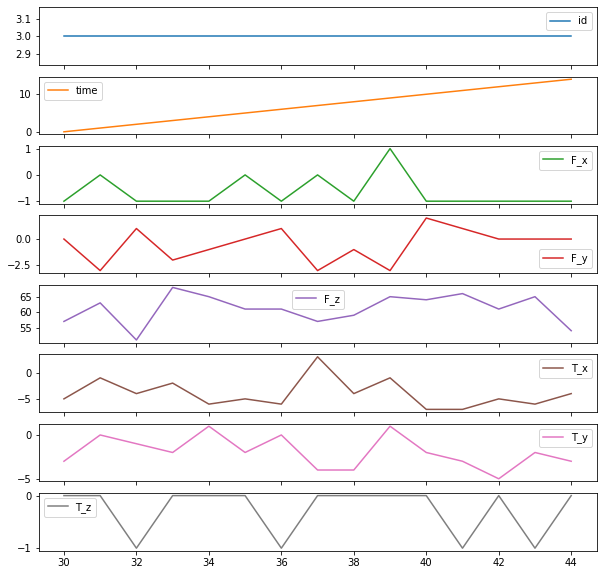

In [ ]:
# TsFresh
# https://tsfresh.readthedocs.io/en/latest/text/quick_start.html
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
# print(timeseries.head())
# print(timeseries.shape)
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [ ]:
X = extract_features(timeseries, column_id="id", column_sort="time")
# X.head()

Feature Extraction: 100%|██████████| 24/24 [00:04<00:00,  5.37it/s]


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98",T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.748067,1.831020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.163956,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.857143


In [ ]:
impute(X)
X_filtered = select_features(X, y)
X_filtered.head()
# Or in 1 line
# features_filtered_direct = extract_relevant_features(timeseries, y,
#                                                    column_id='id', column_sort='time')


/Users/joachim/opt/anaconda3/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__standard_deviation,...,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.471405,...,-0.310265,-0.751682,0.400000,-1.0,-596.000000,-1.0,-1.0,0.0,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,2.054805,...,-0.202951,0.057818,0.533333,-3.6,-680.384615,-1.0,-1.0,0.0,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,1.768867,...,0.539121,0.912474,0.533333,-4.0,-617.000000,-1.0,0.0,0.0,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,2.669998,...,-2.641390,-0.609735,0.533333,-4.6,3426.307692,-1.0,1.0,0.0,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,2.039608,...,0.591927,0.072771,0.466667,-5.0,-2609.000000,-1.0,0.8,0.0,0.0,0.6


In [ ]:
# Train an example classifier on it and see the results. 



X_full_train, X_full_test, y_train, y_test = train_test_split(X, y, test_size=.4)
X_filtered_train, X_filtered_test = X_full_train[X_filtered.columns], X_full_test[X_filtered.columns]

classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_full_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_full_test)))



classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))




In [ ]:
# We would like to know which features got selected and theri relative importance. 
# We could use LASSO



In [ ]:
# FeatueTools

In [ ]:
# AutoFeat